<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">Online Food Ordering</h1>
</div>

<div>
    <h3 style="font-weight: bold; font-family:Times New Roman">Description:</h3>
    <p  style="font-size: 16px;font-family:Times New Roman">his project is based on the analysis of a dataset of online food orders, with the aim of exploring the relationships between demographic factors, location and customer behavior.</p>
</div>
<nav>
    <h3 style="font-weight: bold; font-family:Times New Roman">Attributes:</h3>
    <ul style="font-size: 16px;font-family:Times New Roman">
        <li><strong>Age:</strong> Age of the customer.</li>
        <li><strong>Gender:</strong> Gender of the customer.</li>
        <li><strong>Marital Status:</strong> Marital status of the customer.</li>
        <li><strong>Occupation:</strong> Occupation of the customer.</li>
        <li><strong>Monthly Income:</strong> Monthly income of the customer.</li>
        <li><strong>Educational Qualifications:</strong> Educational qualifications of the customer.</li>
        <li><strong>Family Size:</strong> Number of individuals in the customer's family.</li>
        <li><strong>Latitude:</strong> Latitude of the customer's location.</li>
        <li><strong>Longitude:</strong> Longitude of the customer's location.</li>
        <li><strong>Output:</strong> Current status of the order (e.g., pending, confirmed, delivered).</li>
        <li><strong>Feedback:</strong> Feedback provided by the customer after receiving the order.</li>
    </ul>
</nav>
<div style="font-family:Times New Roman">
    <h3 style="font-weight: bold; font-family:Times New Roman">Purpose:</h3>
    <p  style="font-size: 16px;font-family:Times New Roman">Explore whether there are purchasing relationships for the food sold, understanding the influence of location, age, gender, family size and occupation of the customer on the purchase of the product</p>
</div>

<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">STEP 1 | Importing Data & Libraries</h1>
</div>

In [1]:
!pip install pandas
!pip install matplotlib
!pip install geopy
!pip install seaborn

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import warnings  # Suppress warnings

# HTML & Styles
from colorama import Fore, Style
from IPython.display import display, HTML
import matplotlib.cm as cm
cmap = cm.Oranges



# Palette
palette = ['#ffcce6', '#cce6ff']
color_palette = sns.color_palette(palette)


<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">STEP 2 | Loading Data</h1>
</div>

In [3]:
df_Foods = pd.read_csv('/kaggle/input/online-food-dataset/onlinefoods.csv')

<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">Step 3 | Overview</h1>
</div>

In [4]:
df_Foods.drop(['Unnamed: 12'],inplace=True, axis=1)

In [5]:
def PrintColor(text: str, color=Fore.BLUE, style=Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string"
    print(style + color + text + Style.RESET_ALL)

def print_blue_large(text):
    PrintColor(text, Fore.BLUE + Style.BRIGHT)

def Heading(textLabels):
    length = len(textLabels) + 8
    print(f"\n{Style.BRIGHT}{Fore.RED}{'='*length}{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.RED} || {textLabels}  {Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.RED}{'='*length}{Style.RESET_ALL}")

# Function | Data Overview
def fDataOverview(data):

    # First 5 items of the DataFrame
    Heading("First 5 items of the DataFrame:")
    display(HTML(data.head(5).to_html(index=False).replace('<table border="1" class="data">', '<table style="border: 2px solid green;">')))

    # Remove column
    # df_Foods.drop(['Unnamed: 12'], index=1,inplace=True)
    Heading("COLUMN REMOVED: Unnamed: 12")

    # Information columns
    Heading("Information columns")
    PrintColor(f"Info Dataset | THERE ARE NO NULL VALUES", Fore.CYAN)
    df_Foods.info()

    # Describe
    Heading("Describe Columns")
    display(HTML(df_Foods.describe().to_html(index=False).replace('<table border="1" class="data">', '<table style="border: 2px solid green;">')))

    # Duplicates rows found
    Heading("Duplicates rows found:")
    print(df_Foods.duplicated().sum())

    # Number of rows and columns
    Heading("Number of rows and columns:")
    print(df_Foods.shape)

    Heading("Null values:")
    print(df_Foods.isnull().sum())



In [6]:
fDataOverview(df_Foods)


 || First 5 items of the DataFrame:  


Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive



 || COLUMN REMOVED: Unnamed: 12  

 || Information columns  
Info Dataset | THERE ARE NO NULL VALUES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    obj

Age,Family size,latitude,longitude,Pin code
388.000000,388.000000,388.000000,388.000000,388.000000
24.628866,3.280928,12.972058,77.600160,560040.113402
2.975593,1.351025,0.044489,0.051354,31.399609
18.000000,1.000000,12.865200,77.484200,560001.000000
23.000000,2.000000,12.936900,77.565275,560010.750000
24.000000,3.000000,12.977000,77.592100,560033.500000
26.000000,4.000000,12.997025,77.630900,560068.000000
33.000000,6.000000,13.102000,77.758200,560109.000000



 || Duplicates rows found:  
103

 || Number of rows and columns:  
(388, 12)

 || Null values:  
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64


In [7]:
def unique_values(train_dataset):
    df_UniqueValues = pd.DataFrame({
        'Name': train_dataset.columns,
        'Type': [train_dataset[col].dtype for col in train_dataset.columns],
        'Unique Values': [', '.join(map(str, train_dataset[col].unique()[0:7])) for col in train_dataset.columns]
    })
    display(df_UniqueValues)

Heading("Unique Values in Dataset:")
unique_values(df_Foods)


 || Unique Values in Dataset:  


,Name,Type,Unique Values
0,Age,int64,"20, 24, 22, 27, 23, 21, 28"
1,Gender,object,"Female, Male"
2,Marital Status,object,"Single, Married, Prefer not to say"
3,Occupation,object,"Student, Employee, Self Employeed, House wife"
4,Monthly Income,object,"No Income, Below Rs.10000, More than 50000, 10..."
5,Educational Qualifications,object,"Post Graduate, Graduate, Ph.D, Uneducated, School"
6,Family size,int64,"4, 3, 6, 2, 5, 1"
7,latitude,float64,"12.9766, 12.977, 12.9551, 12.9473, 12.985, 12...."
8,longitude,float64,"77.5993, 77.5773, 77.6593, 77.5616, 77.5533, 7..."
9,Pin code,int64,"560001, 560009, 560017, 560019, 560010, 560103..."


In [8]:
PrintColor('REPORTS')
print_blue_large(f"\n1)The Unnamed: 12 column has been removed from the dataframe. \n2)There are no null values. \n3)Duplicate values: {df_Foods.duplicated().sum()}. \n4)Total number of rows and columns {df_Foods.shape}")

REPORTS

1)The Unnamed: 12 column has been removed from the dataframe. 
2)There are no null values. 
3)Duplicate values: 103. 
4)Total number of rows and columns (388, 12)


<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">Step 4 | Feature Engineering</h1>
</div>

In [9]:
# Function to get a adresss based on latitude and longitude
def get_county_name(latitude, longitude):
    # Inicialized geocoder
    geolocator = Nominatim(user_agent="Online Food Order")
    # Concatenates latitude and longitude into a string in the format "latitude, longitude"
    location = f"{latitude}, {longitude}"
    # Use the geocoder to obtain the address
    address = geolocator.reverse(location)
    # Checks if the address was found
    if address:
        # Extracts the city name from the 'address' subdictionary
        county = address.raw['address'].get('county', '')  # If 'city' does not exist, returns an empty string
        return county
    else:
        return None

# Apply the function to the DataFrame to obtain city names
df_Foods['county'] = df_Foods.apply(lambda row: get_county_name(row['latitude'], row['longitude']), axis=1)

In [10]:
Heading("County column created based on latitude and longitude: count")


 || County column created based on latitude and longitude: count  


In [11]:
PrintColor('REPORTS')
print_blue_large(f"\nCreate Column: {df_Foods['county'].name}")

REPORTS

Create Column: county


<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">Step 5 | EDA Analysis</h1>
</div>

<h3 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#808080; font-size:140%; font-family:Monospace; margin: auto">Summary</h3>

In [12]:
def frequencyNumber(ColumnName, Data, text):

    counts = Data[ColumnName].value_counts()

    # Sort age counts in descending order
    counts = counts.sort_values(ascending=False)

    # Normalize age counts for color gradient
    max_value = counts.max()
    normalized_counts = counts / max_value

    # Create color gradient from dark to light Brown
    cmap = cm.get_cmap('Oranges')
    colors = cmap(normalized_counts)

    # Create a horizontal bar chart
    fig, ax = plt.subplots()
    bars = ax.barh(counts.index, counts.values, color=colors)

    for rect, value in zip(bars, counts.values):
        _x = rect.get_width()  # Get bar width
        _y = rect.get_y() + rect.get_height() / 2
        ax.text(_x + 1, _y, f" {value}", va='center', ha='left', fontsize=8)
        
    # Remove border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    average_age = Data[ColumnName].mean()
    ax.axhline(y=average_age, color='blue', linestyle='--', label=f'Average {ColumnName}')
    average_max = Data[ColumnName].max()
    ax.axhline(y=average_max, color='gray', linestyle='-', label=f'Max {ColumnName}')
    average_min = Data[ColumnName].min()
    ax.axhline(y=average_min, color='gray', linestyle='-', label=f'Min {ColumnName}')

    ax.text(78.0, average_age, f"Avg: {average_age:.2f}", va='center', ha='left', color='blue', fontsize=10)
    ax.text(78.0, average_max, f"Max: {average_max:.2f}", va='center', ha='left', color='gray', fontsize=10)
    ax.text(78.0, average_min, f"Min: {average_min:.2f}", va='center', ha='left', color='gray', fontsize=10)

    # Set labels and title
    plt.xlabel('Frequency of Orders')
    plt.ylabel(ColumnName)
    plt.title(f'Frequency of Orders by {ColumnName}')

    # Improve readability
    plt.yticks(rotation=0)
    
    plt.show()
    
    print_blue_large(f"\nFREQUENCY OF ORDERS BY {ColumnName} \nThe age group with the highest number of requests is {Data[ColumnName].value_counts().idxmax() } {text}, with an average of {Data[ColumnName].mean()} {text}.\nMinimun {ColumnName}:{Data[ColumnName].min()} \nMaximum {ColumnName}:{Data[ColumnName].max()}")


/tmp/ipykernel_18/4007181473.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Oranges')


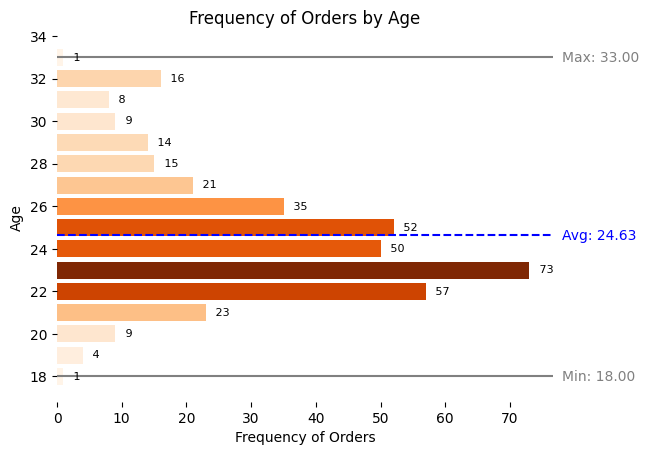


FREQUENCY OF ORDERS BY Age 
The age group with the highest number of requests is 23 years old, with an average of 24.628865979381445 years old.
Minimun Age:18 
Maximum Age:33


In [13]:
frequencyNumber('Age', df_Foods, "years old")

/tmp/ipykernel_18/4007181473.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Oranges')


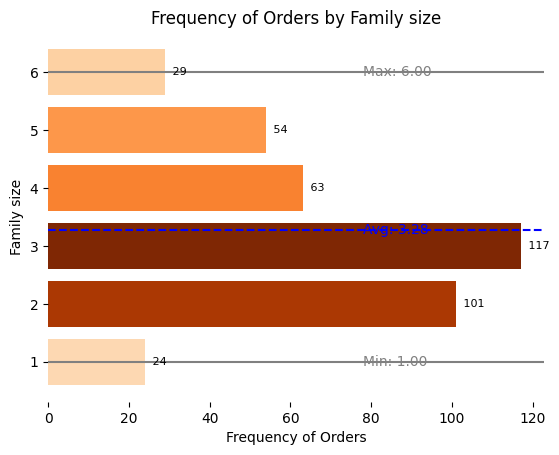


FREQUENCY OF ORDERS BY Family size 
The age group with the highest number of requests is 3 family size, with an average of 3.2809278350515463 family size.
Minimun Family size:1 
Maximum Family size:6


In [14]:
frequencyNumber('Family size', df_Foods, "family size")

In [15]:
def frequency(ColumnName, Dataset):

    counts = Dataset[ColumnName].value_counts()

    counts = counts.sort_values(ascending=True)

    max_value = counts.max()
    normalized_counts = counts / max_value

    cmap = plt.cm.get_cmap('Oranges')
    colors = cmap(normalized_counts)

    fig, ax = plt.subplots()
    bars = ax.barh(counts.index, counts.values, color=colors)

    for rect, value in zip(bars, counts.values):
        _x = rect.get_width()  # Get bar width
        _y = rect.get_y() + rect.get_height() / 2
        ax.text(_x + 1, _y, f" {value}", va='center', ha='left', fontsize=12)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.xlabel('Frequency of Orders')
    plt.ylabel(ColumnName)
    plt.title(f'Frequency of Orders by {ColumnName}')

    # Improve readability
    plt.yticks(rotation=0)

    plt.show()
    
    if ColumnName == "Gender":
        print_blue_large(f"\nFREQUENCY OF ORDERS BY {ColumnName} \nThe {ColumnName} group with the highest number of requests is:\n{Dataset[Dataset[ColumnName] == 'Male'][ColumnName].value_counts()} \n{Dataset[Dataset[ColumnName] == 'Female'][ColumnName].value_counts()}")
    elif ColumnName == "Marital Status":
        print_blue_large(f"\nFREQUENCY OF ORDERS BY {ColumnName} \nThe {ColumnName} group with the highest number of requests is: \n{Dataset[ColumnName].value_counts().idxmax()} {Dataset[Dataset[ColumnName] == 'Single']['Marital Status'].value_counts()}")
    elif ColumnName == "Occupation":
        print_blue_large(f"\nFREQUENCY OF ORDERS BY {ColumnName} \nThe {ColumnName} group with the highest number of requests is: \n{Dataset[Dataset[ColumnName] == 'Student'][ColumnName].value_counts()} {Dataset[Dataset[ColumnName] == 'Employee'][ColumnName].value_counts()}")
    elif ColumnName == "Monthly Income":
        print_blue_large(f"\nFREQUENCY OF ORDERS BY {ColumnName} \nThe {ColumnName} group with the highest number of requests is: \n{Dataset[Dataset[ColumnName] == 'No Income'][ColumnName].value_counts()}")
    elif ColumnName == "Educational Qualifications":
        print_blue_large(f"\nFREQUENCY OF ORDERS BY {ColumnName} \nThe {ColumnName} group with the highest number of requests is: \n{Dataset[Dataset[ColumnName] == 'Graduate'][ColumnName].value_counts()}\n{Dataset[Dataset[ColumnName] == 'Post Graduate'][ColumnName].value_counts()}")
    elif ColumnName == "county":
        print_blue_large(f"\nFREQUENCY OF ORDERS BY {ColumnName} \nThe {ColumnName} group with the highest number of requests is: {Dataset[ColumnName].value_counts().idxmax()}")
    elif ColumnName == "Feedback":
        print_blue_large(f"\nFREQUENCY OF ORDERS BY {ColumnName} \nThe {ColumnName} group with the highest number of requests is: {Dataset[ColumnName].value_counts().idxmax()}")

/tmp/ipykernel_18/367041474.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Oranges')


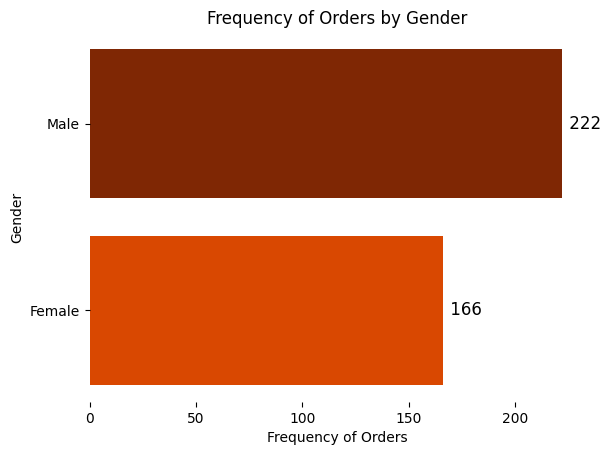


FREQUENCY OF ORDERS BY Gender 
The Gender group with the highest number of requests is:
Gender
Male    222
Name: count, dtype: int64 
Gender
Female    166
Name: count, dtype: int64


In [16]:
frequency('Gender', df_Foods)

/tmp/ipykernel_18/367041474.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Oranges')


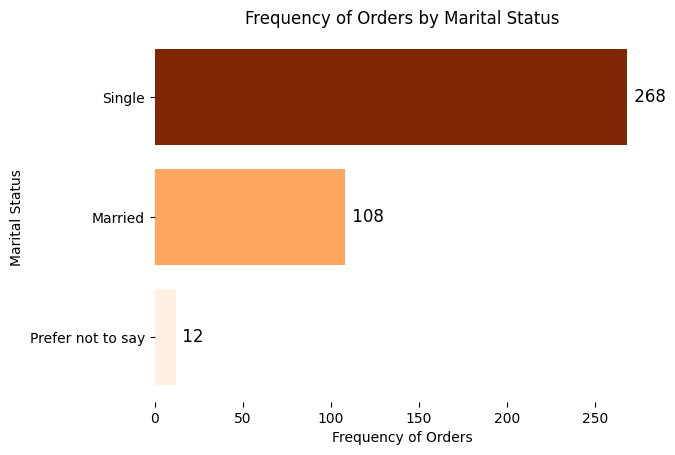


FREQUENCY OF ORDERS BY Marital Status 
The Marital Status group with the highest number of requests is: 
Single Marital Status
Single    268
Name: count, dtype: int64


In [17]:
frequency('Marital Status', df_Foods)

/tmp/ipykernel_18/367041474.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Oranges')


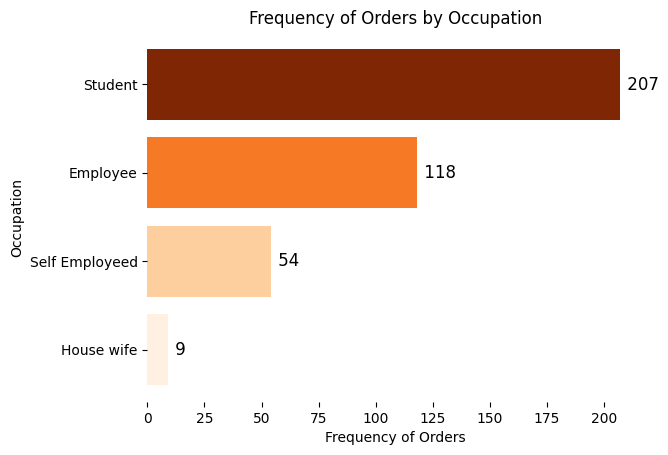


FREQUENCY OF ORDERS BY Occupation 
The Occupation group with the highest number of requests is: 
Occupation
Student    207
Name: count, dtype: int64 Occupation
Employee    118
Name: count, dtype: int64


In [18]:
frequency('Occupation', df_Foods)

/tmp/ipykernel_18/367041474.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Oranges')


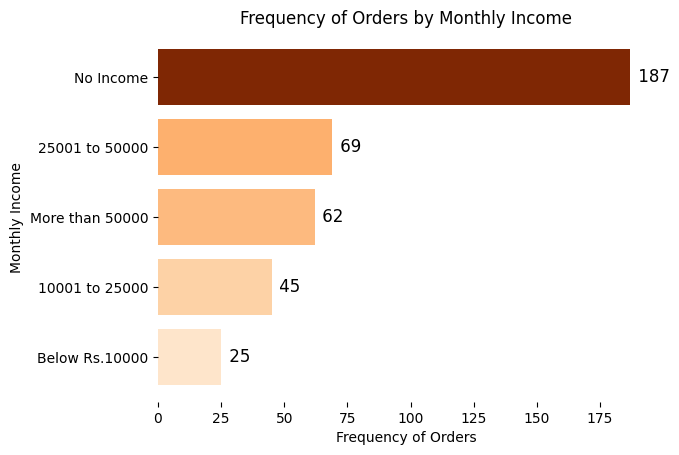


FREQUENCY OF ORDERS BY Monthly Income 
The Monthly Income group with the highest number of requests is: 
Monthly Income
No Income    187
Name: count, dtype: int64


In [19]:
frequency('Monthly Income', df_Foods)

/tmp/ipykernel_18/367041474.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Oranges')


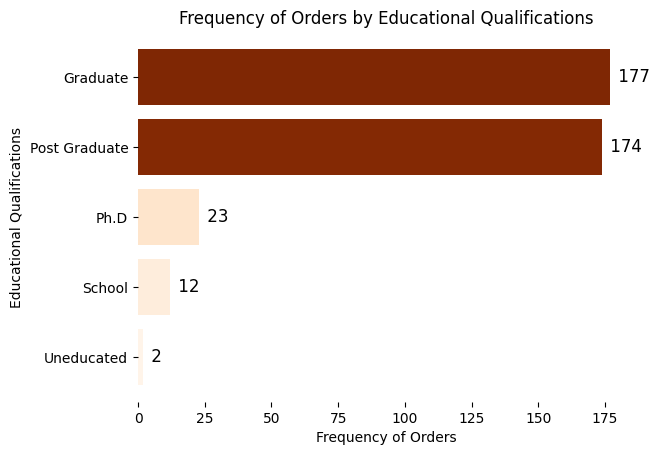


FREQUENCY OF ORDERS BY Educational Qualifications 
The Educational Qualifications group with the highest number of requests is: 
Educational Qualifications
Graduate    177
Name: count, dtype: int64
Educational Qualifications
Post Graduate    174
Name: count, dtype: int64


In [20]:
frequency('Educational Qualifications', df_Foods)

/tmp/ipykernel_18/367041474.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Oranges')


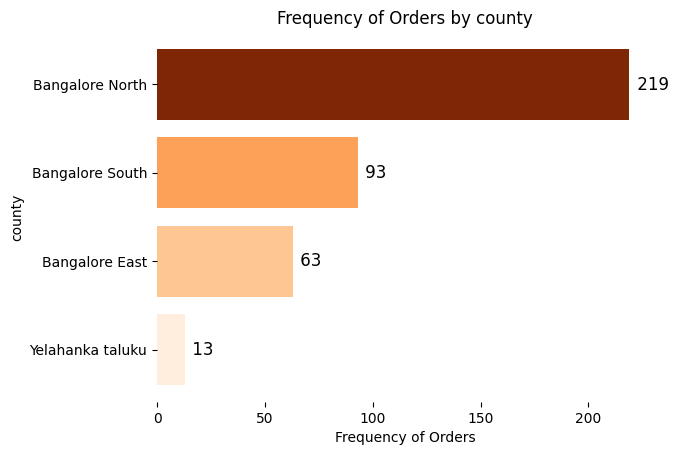


FREQUENCY OF ORDERS BY county 
The county group with the highest number of requests is: Bangalore North


In [21]:
frequency('county', df_Foods)

/tmp/ipykernel_18/367041474.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Oranges')


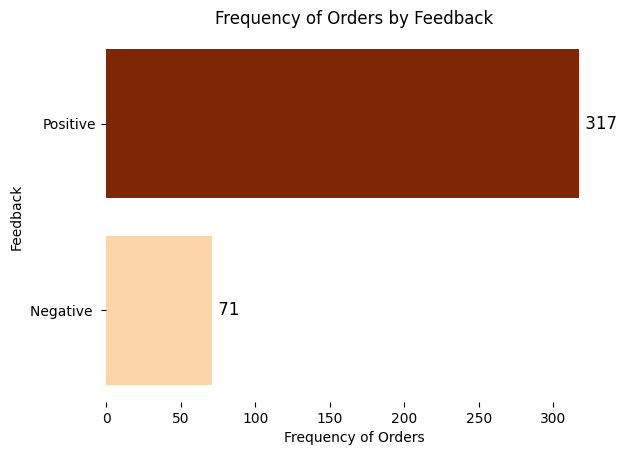


FREQUENCY OF ORDERS BY Feedback 
The Feedback group with the highest number of requests is: Positive


In [22]:
frequency('Feedback', df_Foods)

 <h1 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 20px;">Conclusion</h1>

 <h2 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 16px;">1. Age of Customers</h2>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Most frequent age group: 23 years</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Average age: 24.63 years</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Minimum age: 18 years</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Maximum age: 33 years</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Indicator: The majority of orders are placed by young adults, especially in the 23-year age group. It is essential to target marketing campaigns and promotions towards this demographic.</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Action: Develop specific campaigns for young adults, using social media popular among this age group. Offer discounts and promotions that attract this audience.</h3>

 <h2 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 16px;">2. Family Size</h2>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Most frequent family size: 3 members</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Average family size: 3.28 members</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Minimum family size: 1 member</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Maximum family size: 6 members</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Indicator: Small families, up to 3 members, are the main customers.</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Action: Create family meal offers that cater to small groups, such as "Family Combos" for 3 people.</h3>

 <h2 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 16px;">3. Gender</h2>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Men: 222 orders</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Women: 166 orders</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Indicator: The majority of orders are placed by men.</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Action: Analyze if there are specific products or promotions that attract more men and consider balancing the offers to also attract more women.</h3>

 <h2 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 16px;">4. Marital Status</h2>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Single: 268 orders</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Indicator: The majority of orders come from single individuals.</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Action: Focus on campaigns that emphasize convenience and practicality for singles, such as individual meals or special promotions for single orders.</h3>

 <h2 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 16px;">5. Occupation</h2>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Students: 207 orders</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Employees: 118 orders</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Indicator: Students are the most frequent occupational group among customers.</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Action: Offer discounts for students, create partnerships with universities, and promote campaigns during the academic year to increase penetration in this segment.</h3>

 <h2 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 16px;">6. Monthly Income</h2>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">No Income: 187 orders</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Indicator: Many customers do not have a fixed monthly income, indicating they may be dependents or young people without stable jobs.</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Action: Implement loyalty programs and discounts to encourage order frequency from customers without fixed incomes.</h3>

 <h2 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 16px;">7. Educational Qualifications</h2>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Graduates: 177 orders</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Postgraduates: 174 orders</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Indicator: Most customers have higher education.</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Action: Conduct campaigns that highlight the quality and sophistication of products, aligning with the expectations of this more educated audience.</h3>

 <h2 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 16px;">8. Locality</h2>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Highest number of orders: Bangalore North</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Indicator: Bangalore North is the region with the highest demand.</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Action: Focus marketing and logistics efforts in this area, ensuring fast and efficient delivery to improve customer satisfaction.</h3>

 <h2 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 16px;">9. Feedback</h2>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Majority of feedback: Positive</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Indicator: Most customers are satisfied with the service.</h3>
    <h3 style="font-weight: bold; font-family: 'Courier New', Courier, monospace; color: #0066cc; font-size: 12px;">Action: Maintain the quality of services and products, and analyze positive feedback to identify strengths to be maintained. Address negative feedback for continuous improvements.</h3>

In [23]:
def graphicViolinPlot(_x,_y,filter,data):
    plt.figure(figsize=(7,3))
    plt.title(f'{_x} x {_y} | filtered by {filter}', fontsize=12)
    plt.xlabel(_x, fontsize=8)
    plt.ylabel(_y, fontsize=8)
    plt.legend(title=filter)
    plt.grid(True)
    sns.violinplot(data=data, x=_x, y=_y, hue=filter, split=True, inner="quart", palette=palette)
    

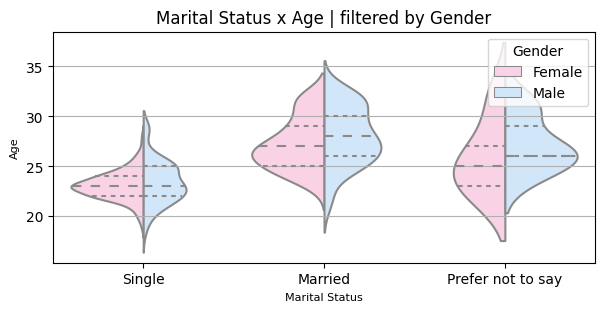

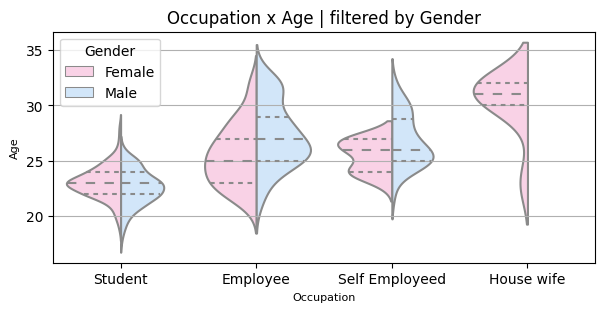

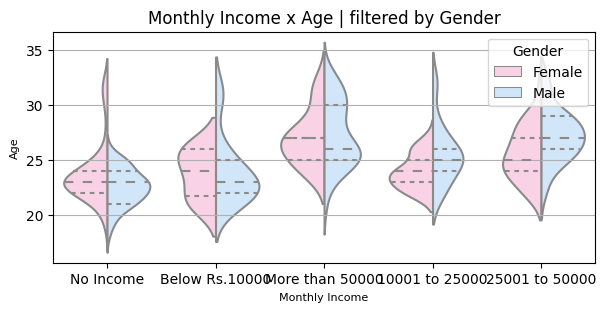

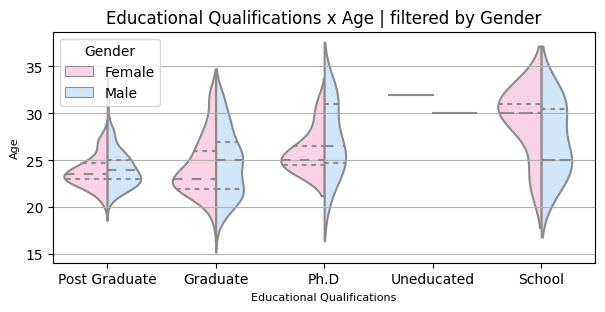

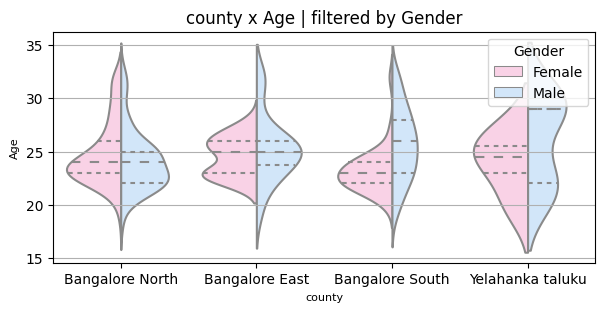

In [24]:
graphicViolinPlot('Marital Status', 'Age', 'Gender', df_Foods)
graphicViolinPlot('Occupation', 'Age', 'Gender', df_Foods)
graphicViolinPlot('Monthly Income', 'Age', 'Gender', df_Foods)
graphicViolinPlot('Educational Qualifications', 'Age', 'Gender', df_Foods)
graphicViolinPlot('county', 'Age', 'Gender', df_Foods)

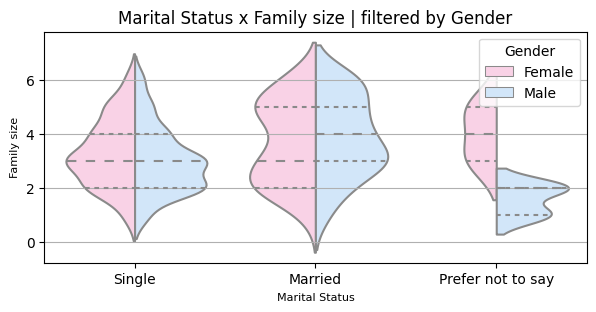

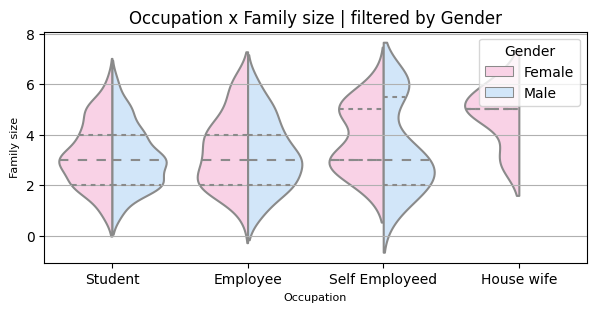

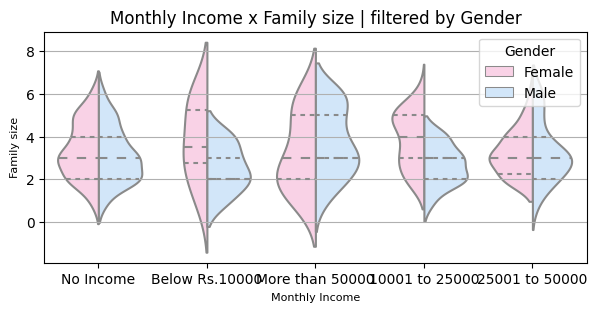

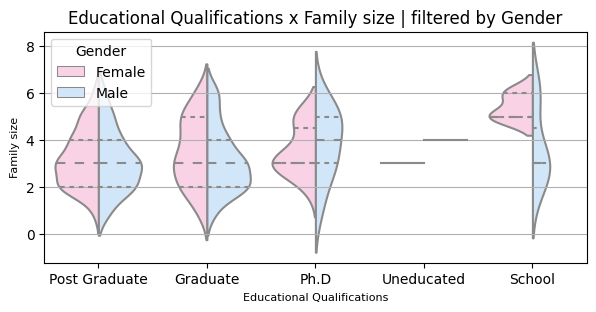

In [25]:
graphicViolinPlot('Marital Status', 'Family size', 'Gender', df_Foods)
graphicViolinPlot('Occupation', 'Family size', 'Gender', df_Foods)
graphicViolinPlot('Monthly Income', 'Family size', 'Gender', df_Foods)
graphicViolinPlot('Educational Qualifications', 'Family size', 'Gender', df_Foods)

<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">Step 6 | Outlier Dedection</h1>
</div>

# Step 7 | Numerical Feature Distribution

# Step 7.1 | Normalization

# Step 8 | Correlation Analysis

# Step 9 | Encoding

# Step 10 | Model Building

# Base Classifier

# Fitting Classifier

# Evaluating Classifier

# Storing Reults in DF and Visualizing the Results